In [2]:
from imgaug import augmenters as iaa
from Manager import *
from VisionUtils import *
import tensorflow as tf
import imgaug as ia
import matplotlib.pyplot as plt
import numpy as np


In [3]:
img = plt.imread("demo\database\pics\jovi.jpg")
img1 = plt.imread("demo\database\pics\April.jpg")
i = 5
#img1 = plt.imread(IMG_RT_PATH +   path1[i])

In [4]:
tf.enable_eager_execution()

Augmented:


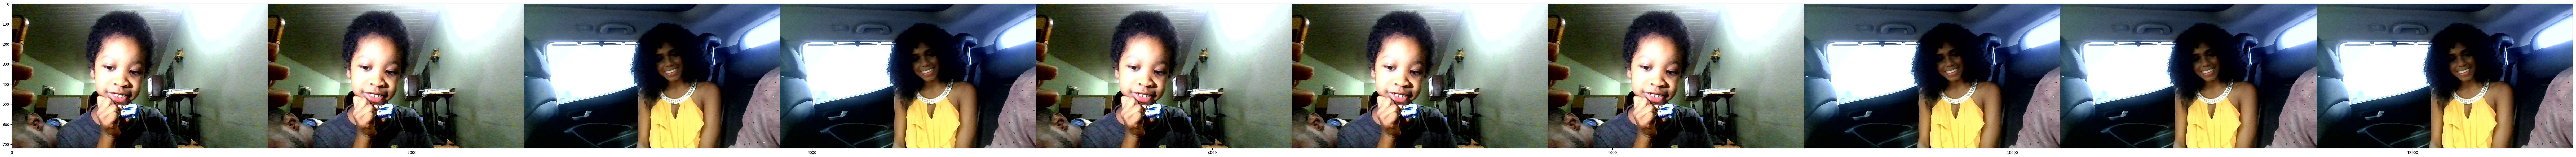

In [5]:

sometimes = lambda aug: iaa.Sometimes(0.5, aug)
images = [img, img,img1, img1, img, img, img, img1, img1, img1]
seq = iaa.Sequential([
    #iaa.Add(per_channel=True),
    #sometimes(iaa.SigmoidContrast()), 
    #iaa.SaltAndPepper(p = 0.05),
    #sometimes(iaa.GammaContrast(per_channel=True, gamma = 1.75)),
    #sometimes(iaa.GammaContrast(per_channel = True, gamma = 0.75)),
    #sometimes(iaa.Multiply(0.45)),
    #sometimes(iaa.Multiply(0.75)),
    iaa.GaussianBlur(),
    #iaa.MotionBlur(k = 20),
], random_order = True)

images_aug = seq.augment_images(images)

print("Augmented:")
ia.imshow(np.hstack(images_aug))

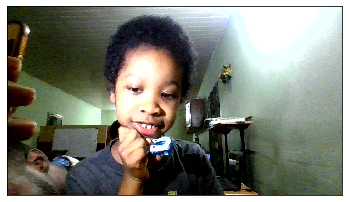

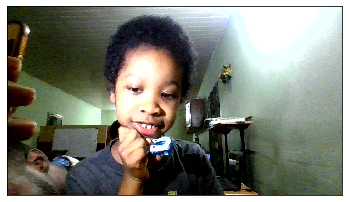

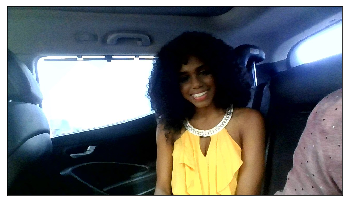

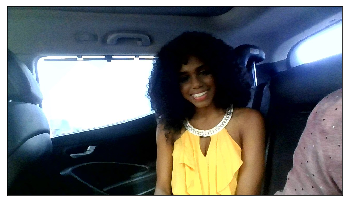

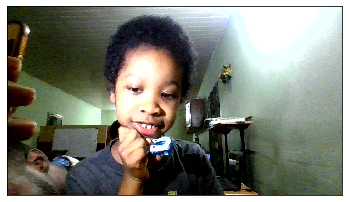

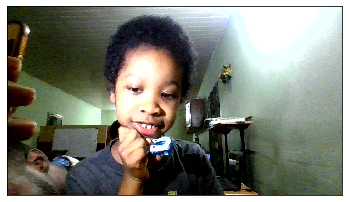

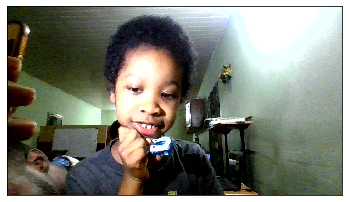

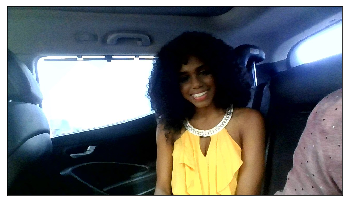

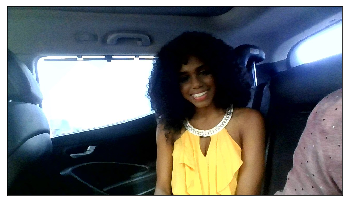

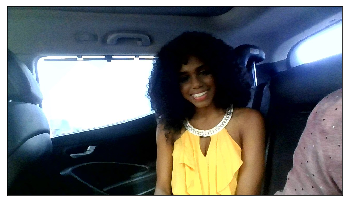

In [7]:
for i in images:
    show_img(i)

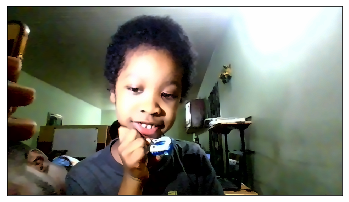

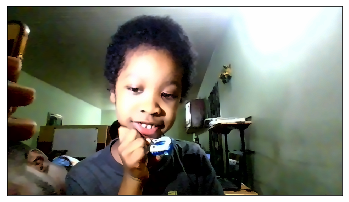

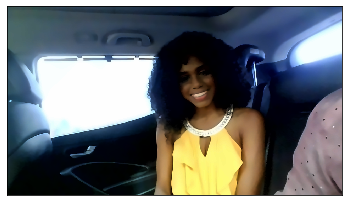

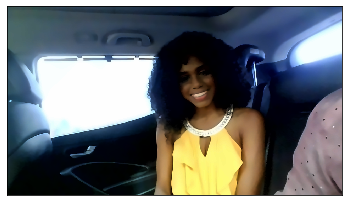

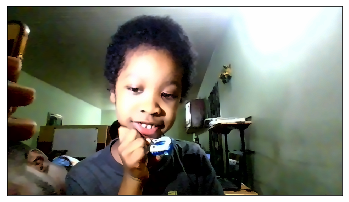

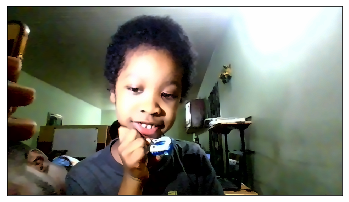

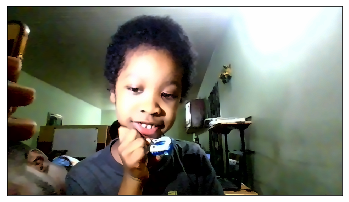

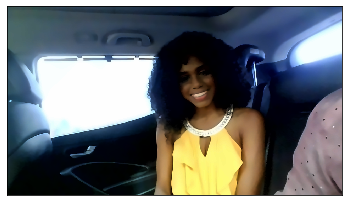

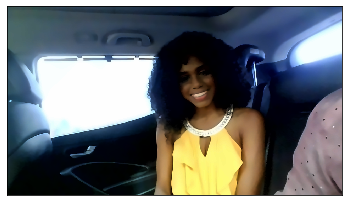

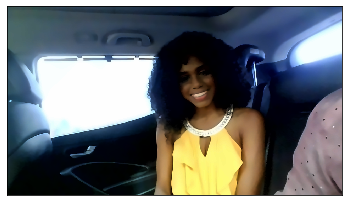

In [9]:
for i in images:
    img = cv2.fastNlMeansDenoisingColored(i,None,10,10,7,21)
    show_img(img)

In [ ]:
images_aug = seq.augment_images(images)

print("Augmented:")
ia.imshow(np.hstack(images_aug))

In [ ]:
images_aug = seq.augment_images(images)

print("Augmented:")
ia.imshow(np.hstack(images_aug))

In [9]:
IMG_RT_PATH = 'data/images/'
FEATURE_RT_PATH = "data/processed/image_features/"
FEATURE_AUG_RT_PATH = "data/image_aug_features/"
IMG_AUG_RT_PATH = 'data/images_aug/'

#img_list = pd.read_csv(IMG_RT_PATH + "test_list.TXT")
feature_extractor = load_model("Models\FaceNet/Facenet_keras.h5")
face_detector = MTCNN()

W0924 17:18:21.509408 22708 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0924 17:18:21.526936 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0924 17:18:21.529016 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0924 17:18:21.576046 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0924 17:18:21.579928 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\mtcnn\layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 17:18:21.58

In [10]:
import os 
img_path_list = []
folder_list = os.listdir(IMG_RT_PATH)
for FOLDER in folder_list:
    image_list_names = os.listdir(IMG_RT_PATH + FOLDER)
    for NAME in image_list_names:
        img_path_list.append(FOLDER+'/'+NAME)

In [11]:
feat_path_list = []
folder_list = os.listdir(FEATURE_RT_PATH)
for FOLDER in folder_list:
    image_list_names = os.listdir(FEATURE_RT_PATH + FOLDER)
    for NAME in image_list_names:
        feat_path_list.append(FOLDER+'/'+NAME)

In [12]:
img_list = pd.DataFrame({"path": feat_path_list})

In [13]:
iman = ImageManager(
    imgpaths = img_list,
    feature_extractor = feature_extractor,
    face_detector =  face_detector, 
    IMG_RTPATH = IMG_RT_PATH,
)

In [14]:
iman.balance_random_sample(200)
paths = iman.get_sample_image_paths()
iman.split(train_size = 0.8)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
path1 = list(iman.xtrainp["path1"].values)
path2 = list(iman.xtrainp["path2"].values)
ytrain = iman.ytrainp

In [16]:
def extract_feature2( feature_extractor, img, bb):
    """
    Extract features given img, bounding box and feature extractor
    """
    insz = feature_extractor.input_shape
    img = resize(img,(insz[1],insz[2]))
    img = normalize(img).reshape((1, insz[1],insz[2], insz[3]))
    image_feature = feature_extractor.predict(img)
    return image_feature

In [189]:
bb1 = detect_faces(images[0], face_detector)
bb2 = detect_faces(images[1], face_detector)
aug[0] = crop_face(aug[0], bb1[0])
aug[1] = crop_face(aug[1], bb2[0])

-Augmented Images


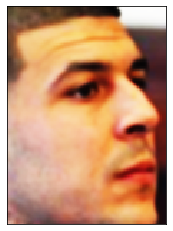

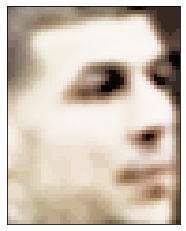

In [192]:
a1 = show_img(aug[0])
a2 = show_img(aug[1])
print("-Augmented Images")

Original


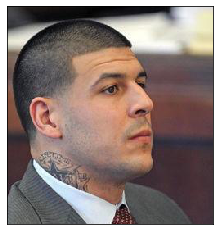

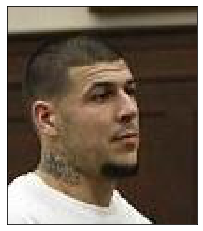

In [193]:
a1 = show_img(images[0])
a2 = show_img(images[1])
print("Original")

In [19]:
i = 0
augment_mode = False
method = "imgaug"
training_features1 = []
training_features2 = []
p2, p1, train_labels = [], [], []

In [20]:
for i in range(len(path1)):
    if (os.path.isfile(IMG_RT_PATH +   path1[i]) and os.path.isfile(IMG_RT_PATH +   path2[i])):
        ### Read In Images
        img1 = plt.imread(IMG_RT_PATH +   path1[i])
        img2 = plt.imread(IMG_RT_PATH +   path2[i])
    else:
        continue
        
    o = images = [img1, img2] 
        ### Detect Faces
    bb1 = detect_faces(images[0], face_detector)
    bb2 = detect_faces(images[1], face_detector)
    if ((len(bb1)== 1) and (len(bb2)==1 )):
            images[0] = crop_face(images[0], bb1[0])
            images[1] = crop_face(images[1], bb2[0])
    else:
        continue
            
    if(augment_mode == True):
        if(method == "imgaug"):
            
            if(i==0): print("Imgaug Image Augmentation in progress")
            images = seq.augment_images(images)
        elif(method == "spotlight"):
            if(i==0): print("Spotlight Image Augmentation in progress")
            spotlight_num = random.randint(1,5)
            for i1 in range(spotlight_num):
                images[0] = add_spot_light(images[0])
                images[1] = add_spot_light(images[1])
            images[0] = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
            images[1] = cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB)
        
        elif(method == "parallel_light"):
            if(i==0): print("Parallel light Image Augmentation in progress")
            parallel_light_num = random.randint(1,5)
            for i2 in range(parallel_light_num):
                images[0] = add_parallel_light(images[0])
                images[1] = add_parallel_light(images[1])
            images[0] = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
            images[1] = cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB)
        else:
            print("Error:Augment_mode = True. But no method specified ")
            break
    else: 
        if(i==0): print("No Image Augmentation in progress")
  
    training_features1.append(extract_feature2(feature_extractor, images[0], bb1[0]))
    training_features2.append(extract_feature2(feature_extractor, images[1], bb2[0]))
    p1.append(path1[i])
    p2.append(path2[i])
    train_labels.append(iman.ytrainp[i])
    #print(path1[i])
    #if (i ==5):break


In [22]:
len(training_features1)

0

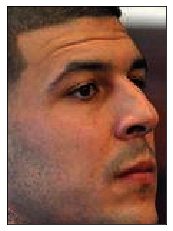

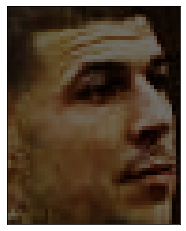

In [232]:
a3 = show_img(images[0])
a4 = show_img(images[1])

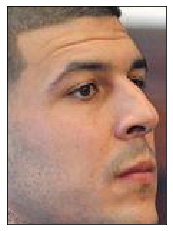

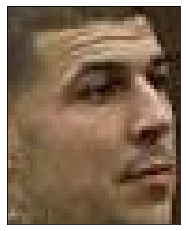

In [233]:
a3 = show_img(o[0])
a4 = show_img(o[1])

In [235]:
train_aug_feat1 = np.vstack(training_features1)
train_aug_feat2 = np.vstack(training_features2)

In [54]:
print(train_aug_feat2.shape)
print(train_aug_feat1.shape)
print(len(train_labels))

(10146, 128)
(10146, 128)
10146


In [236]:
np.save("features/train_aug_feat12.npy", train_aug_feat1) 
np.save("features/train_aug_feat22.npy", train_aug_feat2)
np.save("features/train_aug_labels2.npy", train_labels)
paths_df = pd.DataFrame({
    "path1": p1,
    "path2": p2
})
paths_df.to_csv("features/image_aug_paths.csv")

In [20]:
i = 0
augment_mode = False
training_featureso1 = []
training_featureso2 = []
po2, po1, train_labelso = [], [], []

In [21]:
for i in range(len(path1)):
    if (os.path.isfile(IMG_RT_PATH +   path1[i]) and os.path.isfile(IMG_RT_PATH +   path2[i])):
        img1 = plt.imread(IMG_RT_PATH +   path1[i])
        img2 = plt.imread(IMG_RT_PATH +   path2[i])
        images = [img1, img2]
        if(augment_mode == True):
            images = seq.augment_images(images)
    else:
        continue  
    bb1 = detect_faces(images[0], face_detector)
    bb2 = detect_faces(images[1], face_detector)
    if ((len(bb1)== 1) and (len(bb2)==1 )):
        training_featureso1.append(extract_feature(feature_extractor, images[0], bb1[0]))
        training_featureso2.append(extract_feature(feature_extractor, images[1], bb2[0]))
        po1.append(path1[i])
        po2.append(path2[i])
        train_labelso.append(iman.ytrainp[i])
    

In [22]:
train_feat1 = np.vstack(training_featureso1)
train_feat2 = np.vstack(training_featureso2)

In [23]:
print(train_feat2.shape)
print(train_feat1.shape)
print(len(train_labelso))

(51647, 128)
(51647, 128)
51647


In [24]:
np.save("features/train_feat1.npy", train_feat1) 
np.save("features/train_feat2.npy", train_feat2)
np.save("features/train_labels.npy", train_labelso)
paths_df = pd.DataFrame({
    "path1": po1,
    "path2": po2
})
paths_df.to_csv("features/image_paths.csv")

In [19]:
i = 0
augment_mode = False
test_features1 = []
test_features2 = []
test_po2, test_po1, test_labels = [], [], []

In [20]:
path1 = list(iman.xtestp["path1"].values)
path2 = list(iman.xtestp["path2"].values)

In [21]:
len(path1)

14240

In [23]:
for i in range(len(path1)):
    if (os.path.isfile(IMG_RT_PATH +   path1[i]) and os.path.isfile(IMG_RT_PATH +   path2[i])):
        img1 = plt.imread(IMG_RT_PATH +   path1[i])
        img2 = plt.imread(IMG_RT_PATH +   path2[i])
        images = [img1, img2]
        if(augment_mode == True):
            images = seq.augment_images(images)
    else:
        continue  
    bb1 = detect_faces(images[0], face_detector)
    bb2 = detect_faces(images[1], face_detector)
    if ((len(bb1)== 1) and (len(bb2)==1 )):
        test_features1.append(extract_feature(feature_extractor, images[0], bb1[0]))
        test_features2.append(extract_feature(feature_extractor, images[1], bb2[0]))
        test_po1.append(path1[i])
        test_po2.append(path2[i])
        test_labels.append(iman.ytestp[i])

In [23]:
test_feat1 = np.vstack(test_features1)
test_feat2 = np.vstack(test_features2)

In [24]:
print(test_feat2.shape)
print(test_feat1.shape)
print(len(test_labels))

(12889, 128)
(12889, 128)
12889


In [25]:
np.save("features/test_feat1.npy", test_feat1) 
np.save("features/test_feat2.npy", test_feat2)
np.save("features/test_labels.npy", test_labels)
paths_df = pd.DataFrame({
    "path1": test_po1,
    "path2": test_po2
})
paths_df.to_csv("features/test_image_paths.csv")

In [40]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp37-none-any.whl size=6003 sha256=588be1fe78d82921e35022649c404d0b35961cfc22001f885b6a26889dd8687e
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\cd\05\42\71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [42]:
np.save("features/sample/sample_feat1.npy", iman.xtestp)
np.save("features/sample/sample_feat2.npy", iman.xtrainp)
np.save("features/sample/ytestp_feat1.npy", iman.ytestp)
np.save("features/sample/ytrainp.npy", iman.ytrainp)

path1                path2
38802  n000624/0093_01.jpg  n000624/0238_02.jpg
43828  n000002/0045_01.jpg  n000130/0054_04.jpg
46174  n000958/0360_02.jpg  n000958/0274_01.jpg
14673  n000527/0144_01.jpg  n000958/0273_01.jpg
29050  n000082/0046_02.jpg  n008937/0234_01.jpg
55652  n002329/0194_02.jpg  n002329/0040_01.jpg
47818  n000135/0164_08.jpg  n000056/0056_01.jpg
69061  n000785/0154_01.jpg  n000276/0033_01.jpg
15790  n000119/0024_01.jpg  n000119/0113_01.jpg
22809  n000180/0230_01.jpg  n000180/0169_01.jpg
22994  n000180/0088_01.jpg  n000180/0032_04.jpg
48098  n001199/0218_01.jpg  n001199/0024_01.jpg
45308  n000945/0011_01.jpg  n000945/0622_01.jpg
66984  n006247/0351_04.jpg  n006247/0120_04.jpg
7439   n000928/0113_01.jpg  n000284/0563_01.jpg
67059  n004424/0328_01.jpg  n000160/0036_01.jpg
6006   n000019/0237_01.jpg  n000019/0408_01.jpg
33074  n000029/0455_04.jpg  n000129/0340_01.jpg
18102  n000148/0647_01.jpg  n000148/0049_01.jpg
32218  n006909/0220_02.jpg  n000198/0143_01.jpg
8074   n000040/0174_01.jpg  n000040/0114_03.jpg
65614  n005799/0087_01.jpg  n005799/0263_01.jpg
19609  n000159/0024_01.jpg  n000159/0172_01.jpg
32948  n000299/0146_01.jpg  n000299/0249_01.jpg
39372  n000654/0119_03.jpg  n000654/0355_01.jpg
36629  n003881/0173_01.jpg  n008937/0229_01.jpg
38047  n000527/0132_02.jpg  n000527/0041_01.jpg
32796  n005799/0308_01.jpg  n000736/0282_02.jpg
40329  n000148/0148_01.jpg  n000129/0334_01.jpg
60446  n004050/0142_02.jpg  n004050/0201_02.jpg
...                    ...                  ...
11394  n000078/0023_01.jpg  n000078/0028_02.jpg
31551  n003728/0441_01.jpg  n000094/0156_01.jpg
66803  n006247/0273_01.jpg  n006247/0337_02.jpg
56886  n002761/0079_01.jpg  n002761/0145_01.jpg
67435  n003728/0035_01.jpg  n000217/0143_01.jpg
35773  n000371/0378_01.jpg  n000371/0246_01.jpg
65725  n005799/0416_01.jpg  n005799/0295_01.jpg
59150  n000172/0068_01.jpg  n000259/0385_01.jpg
2747   n000148/0092_01.jpg  n000082/0549_03.jpg
18431  n000149/0026_01.jpg  n000149/0202_01.jpg
25658  n000198/0156_01.jpg  n000198/0217_01.jpg
28693  n000950/0582_02.jpg  n009294/0067_01.jpg
53707  n002158/0259_01.jpg  n002158/0213_01.jpg
5311   n000017/0179_01.jpg  n000017/0009_01.jpg
67969  n000217/0237_01.jpg  n000391/0155_01.jpg
64925  n005723/0139_02.jpg  n005723/0019_01.jpg
62955  n005347/0269_02.jpg  n005347/0004_01.jpg
59735  n003881/0035_01.jpg  n003881/0145_01.jpg
769    n000148/0069_01.jpg  n008937/0558_01.jpg
64820  n005723/0005_01.jpg  n005723/0116_01.jpg
67221  n006909/0146_01.jpg  n006909/0218_01.jpg
41090  n000178/0103_01.jpg  n000667/0357_01.jpg
16023  n000127/0209_01.jpg  n000127/0060_01.jpg
60263  n000736/0181_02.jpg  n000658/0052_01.jpg
44131  n000838/0045_01.jpg  n000838/0171_01.jpg
37194  n006247/0401_03.jpg  n000391/0059_01.jpg
6265   n003894/0196_01.jpg  n000160/0109_01.jpg
54886  n002257/0128_02.jpg  n002257/0124_01.jpg
860    n000003/0041_01.jpg  n000003/0148_01.jpg
15795  n000119/0147_02.jpg  n000119/0142_01.jpg

[56960 rows x 2 columns]

In [10]:
import numpy as np
np.random.choice([0,1], replace = False)

0